# Nuages de mots

## Imports et stopwords

In [4]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [6]:
# Choisir une année
year = 1930

In [7]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1930_Tome_II1_Part_1.txt',
 'Bxl_1930_Tome_II1_Part_10.txt',
 'Bxl_1930_Tome_II1_Part_11.txt',
 'Bxl_1930_Tome_II1_Part_2.txt',
 'Bxl_1930_Tome_II1_Part_3.txt',
 'Bxl_1930_Tome_II1_Part_4.txt',
 'Bxl_1930_Tome_II1_Part_5.txt',
 'Bxl_1930_Tome_II1_Part_6.txt',
 'Bxl_1930_Tome_II1_Part_7.txt',
 'Bxl_1930_Tome_II1_Part_8.txt',
 'Bxl_1930_Tome_II1_Part_9.txt',
 'Bxl_1930_Tome_II2_Part_1.txt',
 'Bxl_1930_Tome_II2_Part_10.txt',
 'Bxl_1930_Tome_II2_Part_11.txt',
 'Bxl_1930_Tome_II2_Part_2.txt',
 'Bxl_1930_Tome_II2_Part_3.txt',
 'Bxl_1930_Tome_II2_Part_4.txt',
 'Bxl_1930_Tome_II2_Part_5.txt',
 'Bxl_1930_Tome_II2_Part_6.txt',
 'Bxl_1930_Tome_II2_Part_7.txt',
 'Bxl_1930_Tome_II2_Part_8.txt',
 'Bxl_1930_Tome_II2_Part_9.txt',
 'Bxl_1930_Tome_I_Part_1.txt',
 'Bxl_1930_Tome_I_Part_2.txt',
 'Bxl_1930_Tome_I_Part_3.txt',
 'Bxl_1930_Tome_I_Part_4.txt',
 'Bxl_1930_Tome_I_Part_5.txt',
 'Bxl_1930_Tome_I_Part_6.txt',
 'Bxl_1930_Tome_I_Part_7.txt',
 'Bxl_1930_Tome_I_Part_8.txt',
 'Bxl_1930_Tome_I_Part

In [8]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [9]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

31

In [10]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE\n\nDE\n\nBRUXELLES\n\nBULLETIN COMMUNAL\nA N N É E\n\n1930\n\nTOME\n\nII\n\nBRUXELLES\nIMPRIMERIE\n\nE . G U Y O T , S. A.\n\n12. rue Pachéco, 12\n1 930\n\n\x0c\x0cN" l .\n\nCOMTTE RENDU DE LA SÉANCE DU 7 JUILLET IfWO.\n\nV I L'

In [11]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [12]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'VILLE\n\nDE\n\nBRUXELLES\n\nBULLETIN COMMUNAL\nA N N É E\n\n1930\n\nTOME\n\nII\n\nBRUXELLES\nIMPRIMERIE\n\nE . G U Y O T , S. A.\n\n12. rue Pachéco, 12\n1 930\n\n\x0c\x0cN" l .\n\nCOMTTE RENDU DE LA SÉANCE DU 7 JUILLET IfWO.\n\nV I L L E\n\nD E\n\nBULLETIN\nAnnée\n\nC O N S E I L\nSéance\n\nB R U X E L L E S\n\nGO M M U N AI\n1930.\n\nC O M M U N A L\n\ndu 7 Juillet\n\n1930.\n\nPrésidence de M . ADOLPHE M A X , Bourgmestre.\n\nSOMMAIRE :\nPAGES.\n\n1.\n2.\n3.\n\nCommunications\n. . .\n5\nDémission de M. l\'Echevin Jacqmain\n20\nElection et prestation de serment d'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [13]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [14]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1930_clean.txt!'

In [15]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()
print(len(after))
after[:1000]

2244027


'bruxelles bulletin communal tome bruxelles imprimerie rue pachéco comtte rendu séance juillet ifwo bulletin année séance juillet présidence adolphe bourgmestre sommaire pages communications démission echevin jacqmain election prestation serment échevin meulebroeck suppression partie impasse sorbier arrêté définitif adoption suppression impasse asile rue six jetons suppression impasse vendanges place jeude balle modification alignement rue fabriques angle rue six jetons commission assistance publique aotes divers administration avi tvoi eglise saint nicolas bourse location eglise sainte gertrude etterbeek compte eglises évangéliques protestantes bruxelles districts comptes communauté israélite compte cimetière evere rétrocession concession perpétuelle adoption cahier charges location droit stationnement voitures place juillet pages caisse pensions compte gestion ponr approbation crédits supplémentaires exercice habillement personnel police garçons bureau administration centrale adoptio

## Nuage de mots

### Afficher les termes les plus fréquents


In [16]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))
frequencies[:10]

[('rue', 2279), ('francs', 2175), ('bruxelles', 1339), ('service', 1276), ('frais', 1112), ('recettes', 974), ('conseil', 966), ('travaux', 917), ('entretien', 893), ('collège', 877)]


TypeError: unhashable type: 'slice'

### Créer, stocker et afficher le nuage de mots

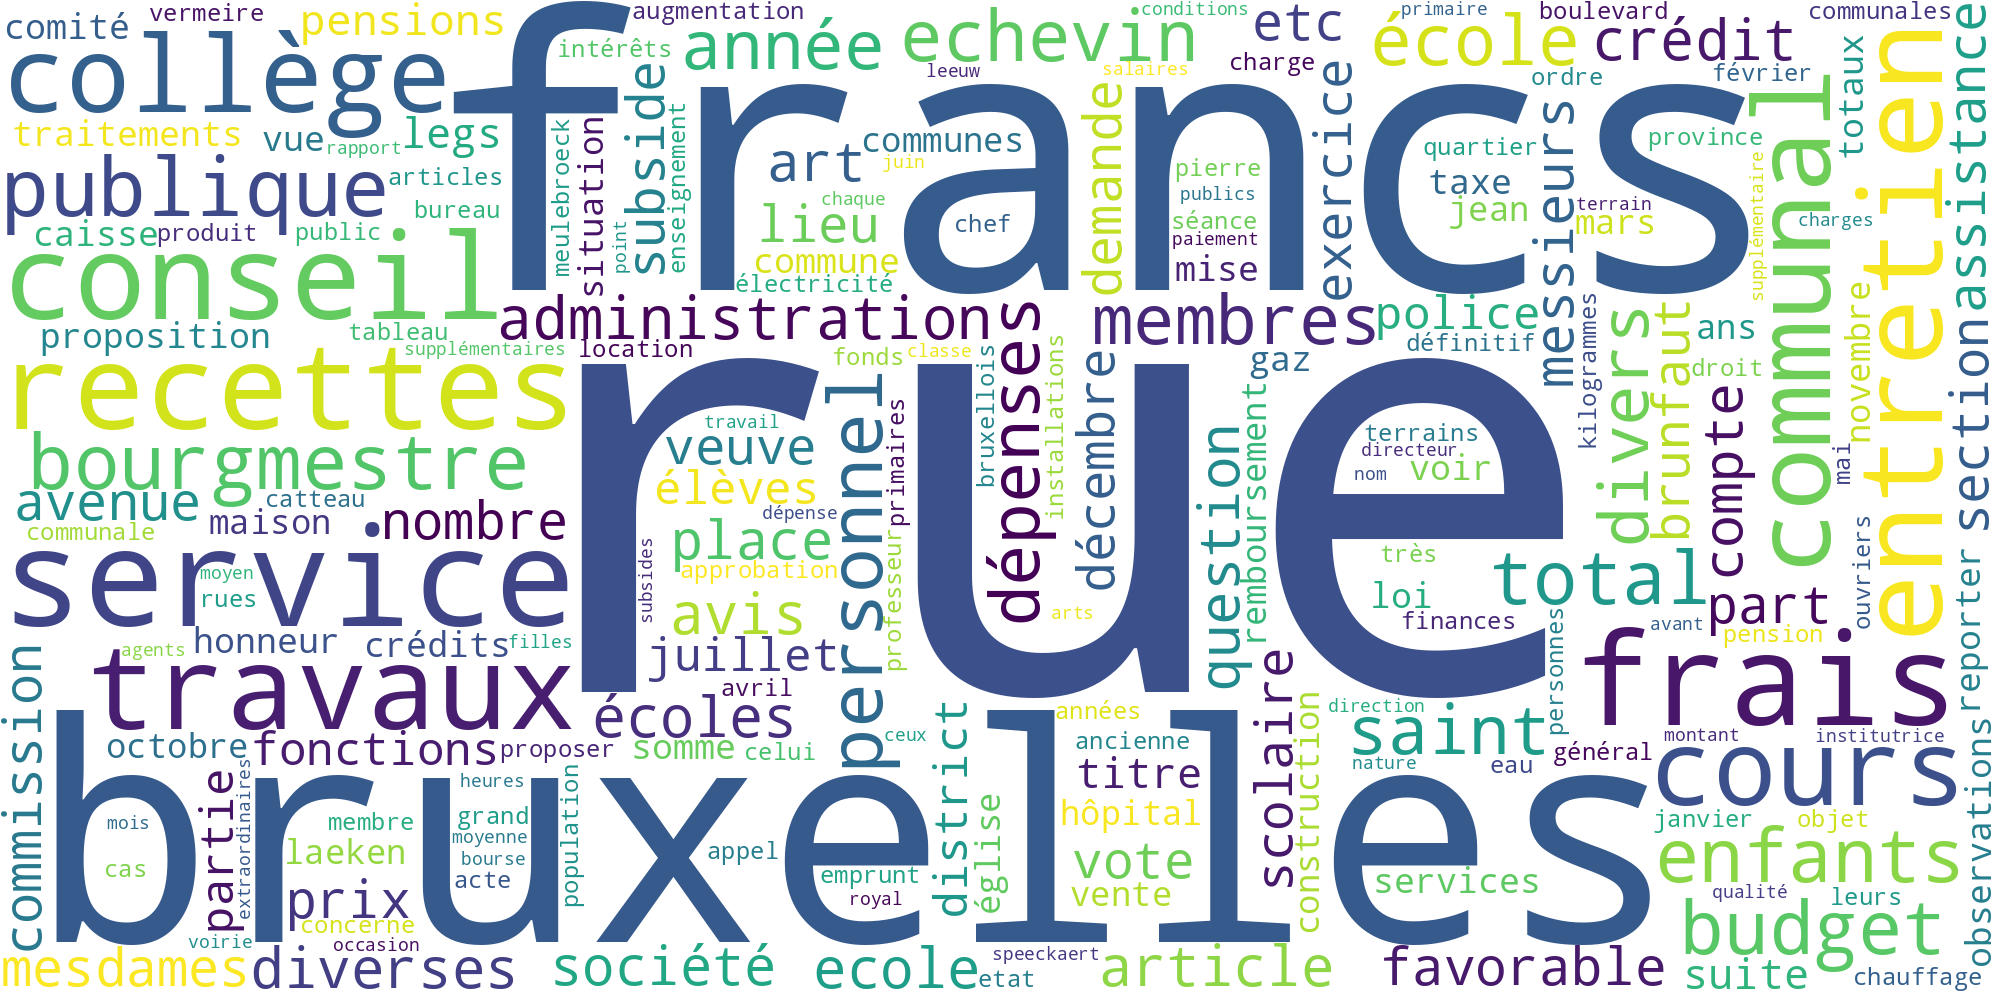

In [29]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))